In [5]:
import scipy as sp 
nYear=5                 # number of years
costEquipment= 5e6      # 5 million 
n=nYear+1               # add year zero
price=28                # price of the product 
units=100000            # estimate number of units sold
otherCost=100000        # other costs 
sellingCost=1500        # selling and administration cost 
R_and_D=200000          # Research and development 
costRawMaterials=0.3    # percentage cost of raw materials
R=0.15                  # discount rate 
tax=0.38                # corporate tax rate 
#
sales=sp.ones(n)*price*units 
sales[0]=0   # sales for 1st year is zero 
cost1=costRawMaterials*sales 
cost2=sp.ones(n)*otherCost 
cost3=sp.ones(n)*sellingCost 
cost4=sp.zeros(n) 
cost4[0]=costEquipment
RD=sp.zeros(n) 
RD[0]=R_and_D                # assume R&D at time zero 
D=sp.ones(n)*costEquipment/nYear  # straight line depreciation 
D[0]=0                            # no depreciation at time 0 
EBIT=sales-cost1-cost2-cost3-cost4-RD-D 
NI=EBIT*(1-tax) 
FCF=NI+D          # add back depreciation 
npvProject=sp.npv(R,FCF)         # estimate NPV 
npvProject = round(npvProject,0)
print("NPV of project=", npvProject) 

NPV of project= 1849477.0


In [6]:
import scipy as sp 
import matplotlib.pyplot as plt 
nYear=5      # number of years 
costEquipment=5e6       # 5 million 
n=nYear+1               # add year zero 
otherCost=100000        # other costs 
sellingCost=1500        # selling and administration cost 



mean NPV of project= 1.0
min  NPV of project= -2.0
max  NPV of project= 6.0


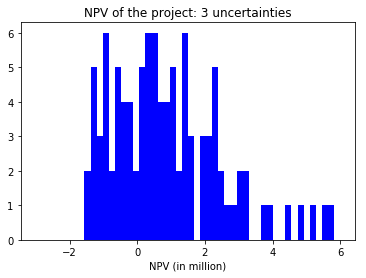

In [8]:
R_and_D=200000    # Research and development
costRawMaterials=0.3    # percentage cost of raw materials
tax=0.38                # corporate tax rate 
thousand=1e3            # unit of thousand 
million=1e6             # unit of million 
# 
# three uncertainties: price, unit and discount rate 
nSimulation=100         # number of simulation
lowPrice=10             # low price
highPrice=30            # high price
lowUnit=50*thousand     # low units expected to sell 
highUnit=200*thousand   # high units expected to sell
lowRate=0.15            # lower discount rate
highRate=0.25           # high discount rate
#
n2=nSimulation 
sp.random.seed(888)
price0=sp.random.uniform(low=lowPrice,high=highPrice,size=n2) 
units0=sp.random.uniform(low=lowUnit,high=highUnit,size=n2)
R0=sp.random.uniform(lowRate,highRate,size=n2) 
#
npv=[]
for i in sp.arange(nSimulation):
    units=sp.ones(n)*units0[i]
    price=price0[i]
    R=R0[i]
    sales=units*price
    sales[0]=0    # sales for 1st year is zero
    cost1=costRawMaterials*sales
    cost2=sp.ones(n)*otherCost
    cost3=sp.ones(n)*sellingCost
    cost4=sp.zeros(n)
    cost4[0]=costEquipment
    RD=sp.zeros(n)
    RD[0]=R_and_D                     # assume R&D at time zero
    D=sp.ones(n)*costEquipment/nYear  # straight line depreciation
    D[0]=0                            # no depreciation at time 0
    EBIT=sales-cost1-cost2-cost3-cost4-RD-D 
    NI=EBIT*(1-tax)
    FCF=NI+D                          # add back depreciation
    npvProject=sp.npv(R,FCF)/million  # estimate NPV
    npv.append(npvProject)
print("mean NPV of project=",round(sp.mean(npv),0))
print("min  NPV of project=",round(min(npv),0))
print("max  NPV of project=",round(max(npv),0))
plt.title("NPV of the project: 3 uncertainties")
plt.xlabel("NPV (in million)") 
plt.hist(npv, 50, range=[-3, 6], facecolor='blue', align='mid') 
plt.show()